# ELAIS-N2 master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
44f1ae0 (Thu Nov 30 18:27:54 2017 +0000)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn2

from herschelhelp_internal.masterlist import (nb_compare_mags, nb_ccplots, nb_histograms, find_last_ml_suffix,
                                              quick_checks)

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20170710"

master_catalogue_filename = "master_catalogue_elais-n2_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: master_catalogue_elais-n2_20171207.fits


## 0 - Quick checks

On the test square degree these showed megacam_y (From RCSLenS) to be empty. Perhaps we should remove it.

In [4]:
quick_checks(master_catalogue).show_in_notebook()

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(152, False) will return an array of dtype('bool')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(152, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


Table shows only problematic columns.


## I - Summary of wavelength domains

In [5]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

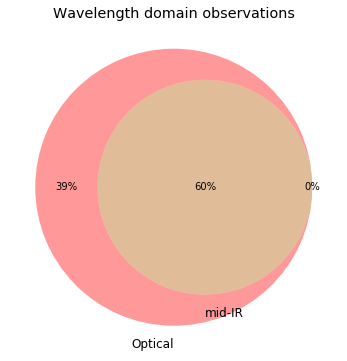

In [6]:
venn2(
    [
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 5)
    ],
    set_labels=('Optical', 'mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

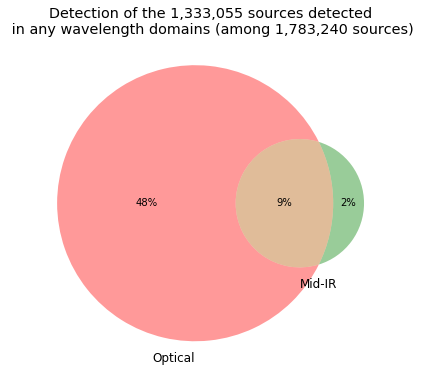

In [7]:
venn2(
    [
        np.sum(flag_det[flag_obs == 5] == 1),
        np.sum(flag_det[flag_obs == 5] == 4),
        np.sum(flag_det[flag_obs == 5] == 5)
    ],
    set_labels=('Optical', 'Mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [8]:
u_bands = ["WFC u", "Megacam u"]
g_bands = ["WFC g", "Megacam g", "GPC1 g"]
r_bands = ["WFC r", "Megacam r", "GPC1 r"]
i_bands = ["WFC i", "Megacam i", "GPC1 i"]
z_bands = ["WFC z", "Megacam z", "GPC1 z"]
y_bands = [         "Megacam y", "GPC1 y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

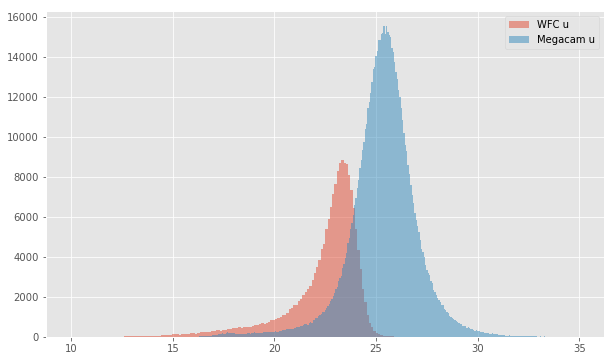

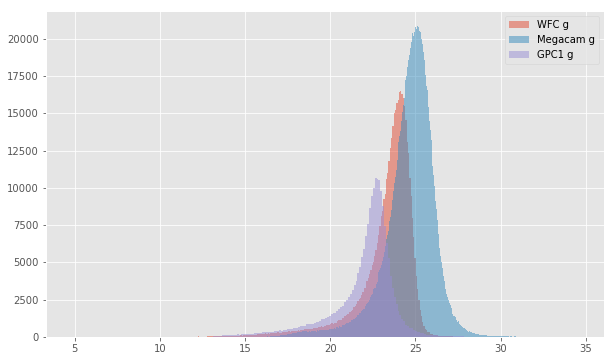

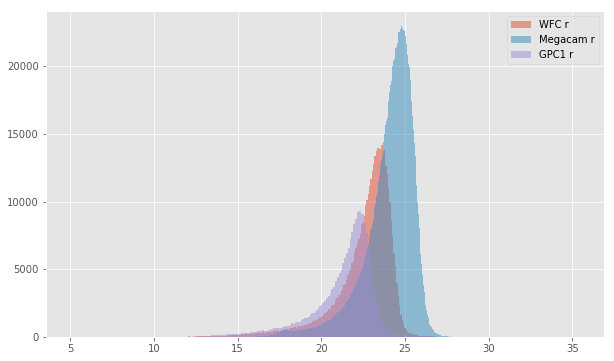

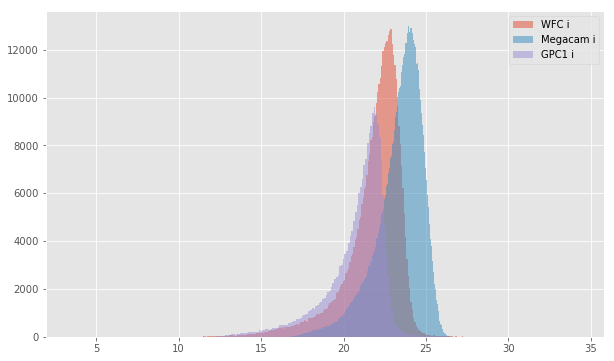

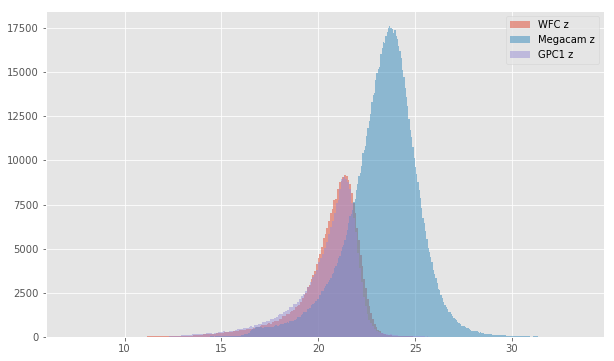

HELP warning: the column m_megacam_y (Megacam y) is empty.


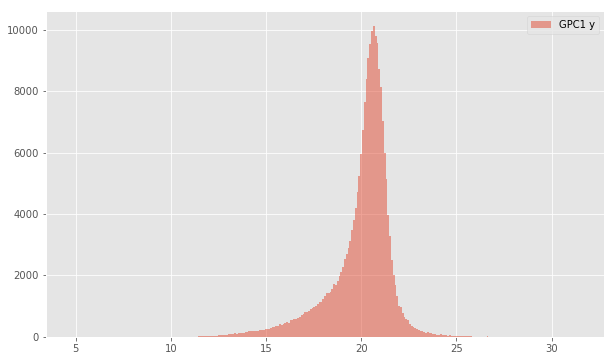

In [9]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

Megacam u (aperture) - WFC u (aperture):
- Median: -0.04
- Median Absolute Deviation: 0.25
- 1% percentile: -0.8018979835510254
- 99% percentile: 3.7088455772399915


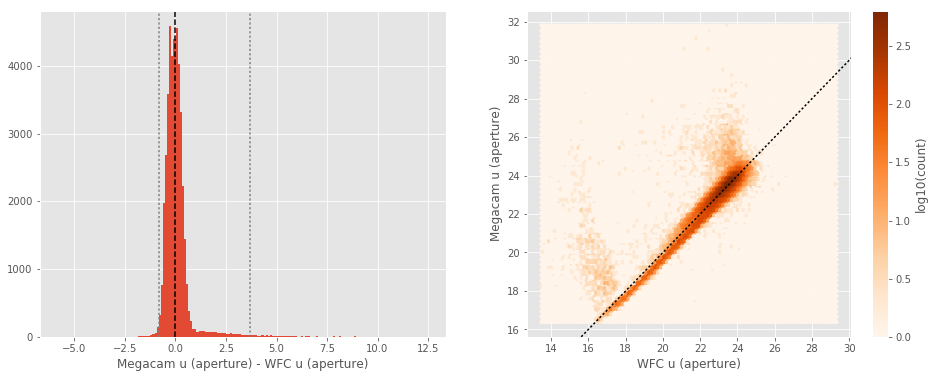

Megacam u (total) - WFC u (total):
- Median: -0.24
- Median Absolute Deviation: 0.20
- 1% percentile: -1.133989028930664
- 99% percentile: 2.9416127777099588


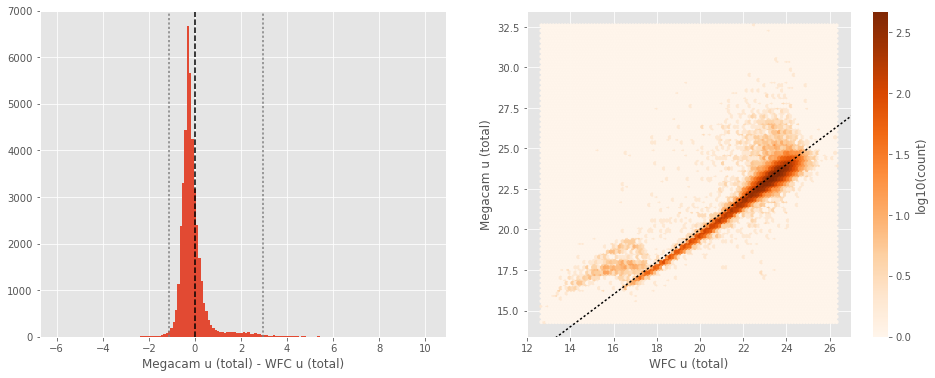

Megacam g (aperture) - WFC g (aperture):
- Median: 0.07
- Median Absolute Deviation: 0.16
- 1% percentile: -0.6488978195190429
- 99% percentile: 1.2106095886230488


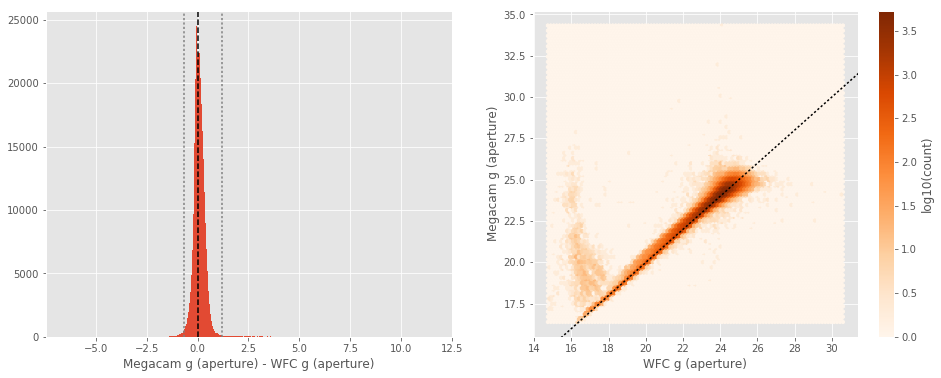

Megacam g (total) - WFC g (total):
- Median: -0.07
- Median Absolute Deviation: 0.16
- 1% percentile: -1.0853500366210938
- 99% percentile: 1.7762260437011719


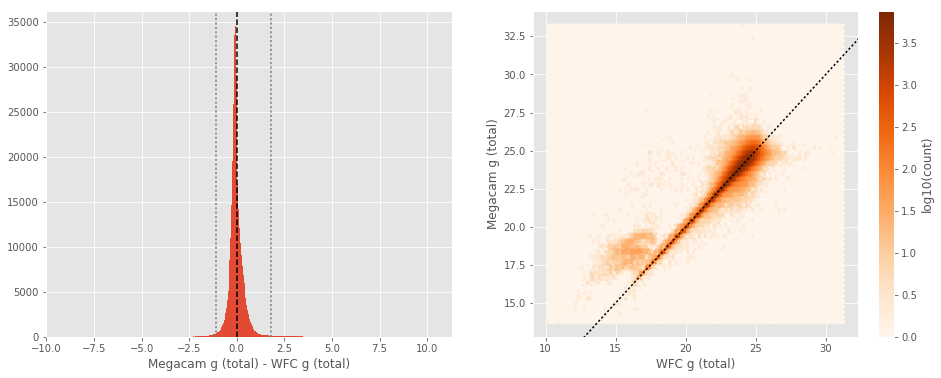

GPC1 g (aperture) - WFC g (aperture):
- Median: -0.04
- Median Absolute Deviation: 0.23
- 1% percentile: -1.936914939880371
- 99% percentile: 2.213923206329347


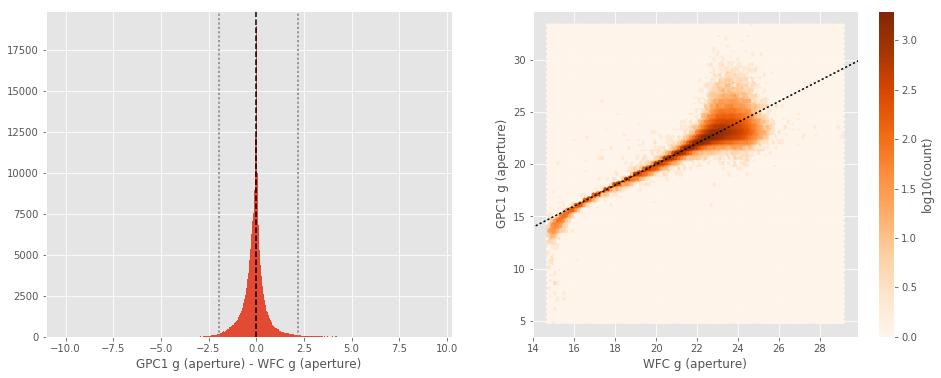

GPC1 g (total) - WFC g (total):
- Median: 0.03
- Median Absolute Deviation: 0.21
- 1% percentile: -2.2826806068420407
- 99% percentile: 1.6533357620239293


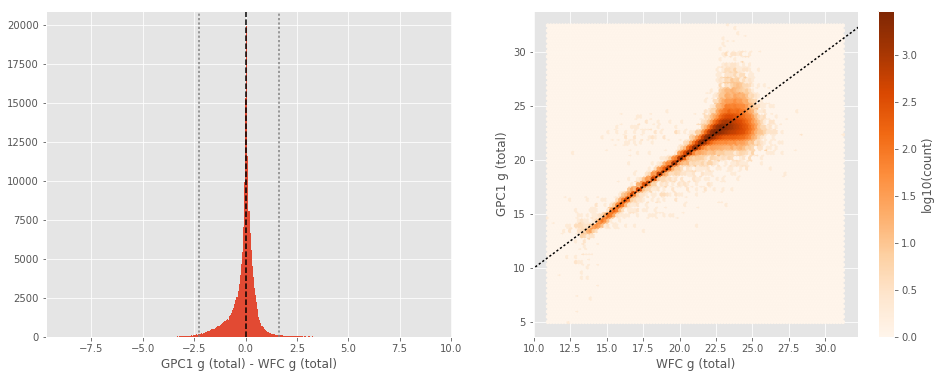

GPC1 g (aperture) - Megacam g (aperture):
- Median: -0.14
- Median Absolute Deviation: 0.34
- 1% percentile: -3.5418136596679686
- 99% percentile: 2.190652847290034


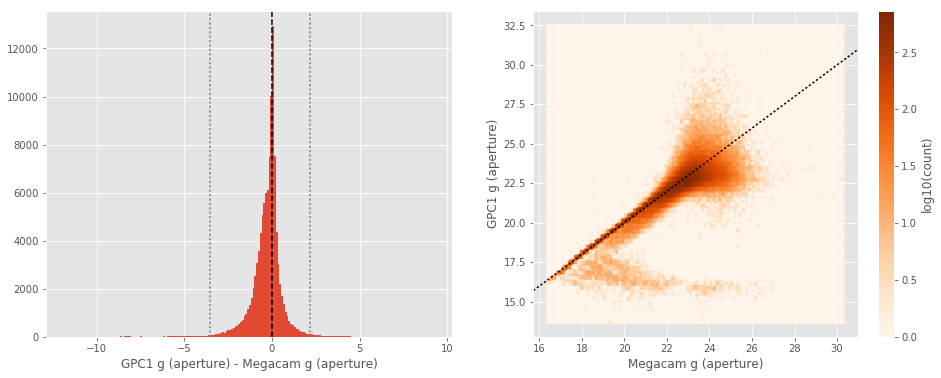

GPC1 g (total) - Megacam g (total):
- Median: 0.09
- Median Absolute Deviation: 0.24
- 1% percentile: -3.3011077880859374
- 99% percentile: 1.7509324264526356


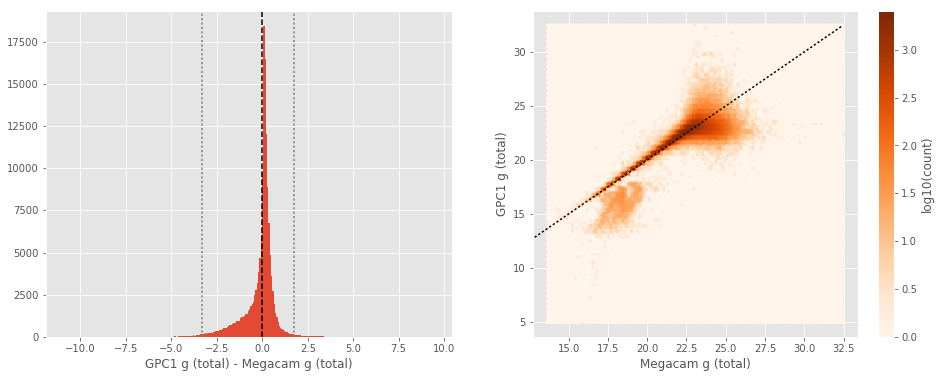

Megacam r (aperture) - WFC r (aperture):
- Median: 0.06
- Median Absolute Deviation: 0.15
- 1% percentile: -0.6783035278320313
- 99% percentile: 1.7159394073486296


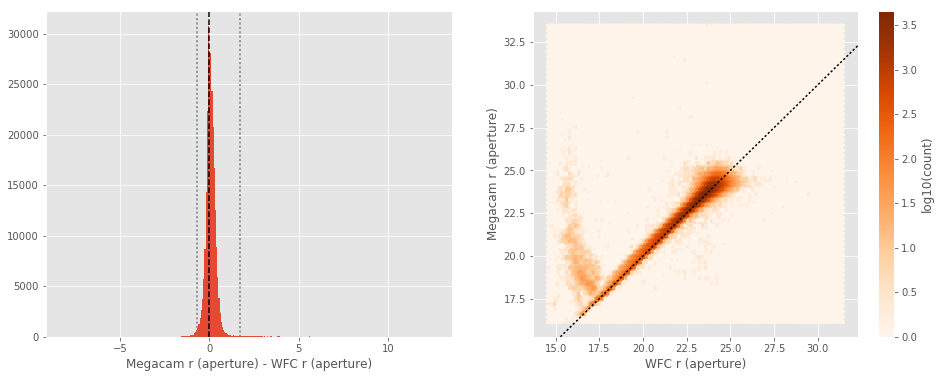

Megacam r (total) - WFC r (total):
- Median: -0.11
- Median Absolute Deviation: 0.14
- 1% percentile: -1.1467682075500487
- 99% percentile: 1.8119490242004397


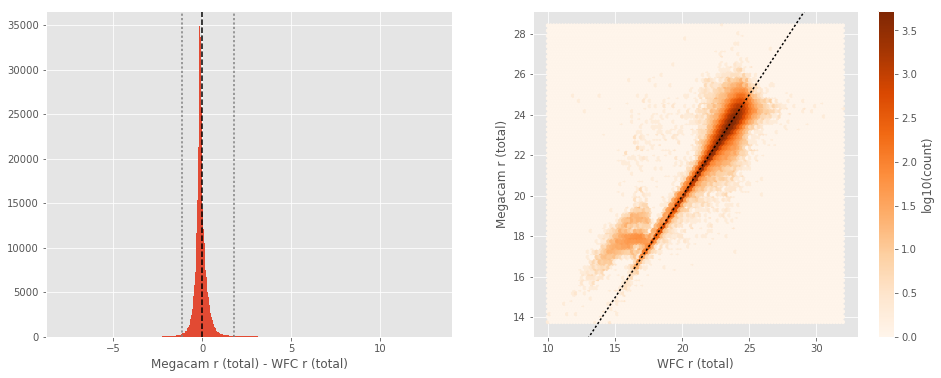

GPC1 r (aperture) - WFC r (aperture):
- Median: -0.04
- Median Absolute Deviation: 0.13
- 1% percentile: -1.1710252380371093
- 99% percentile: 1.3535482025146466


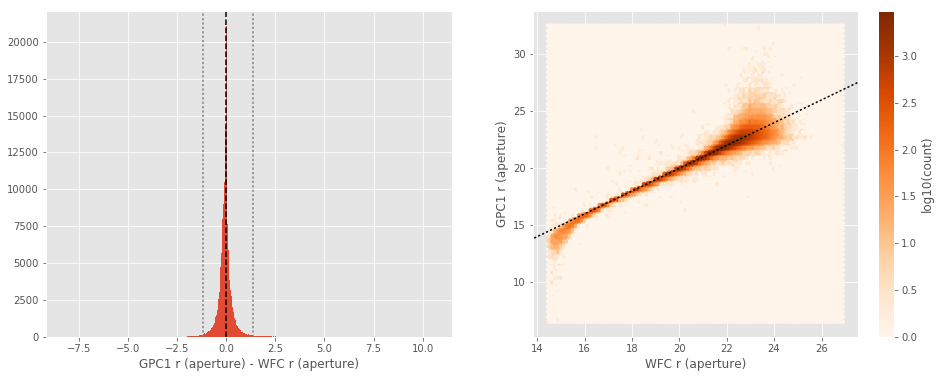

GPC1 r (total) - WFC r (total):
- Median: 0.03
- Median Absolute Deviation: 0.12
- 1% percentile: -1.5002924537658693
- 99% percentile: 1.019995574951169


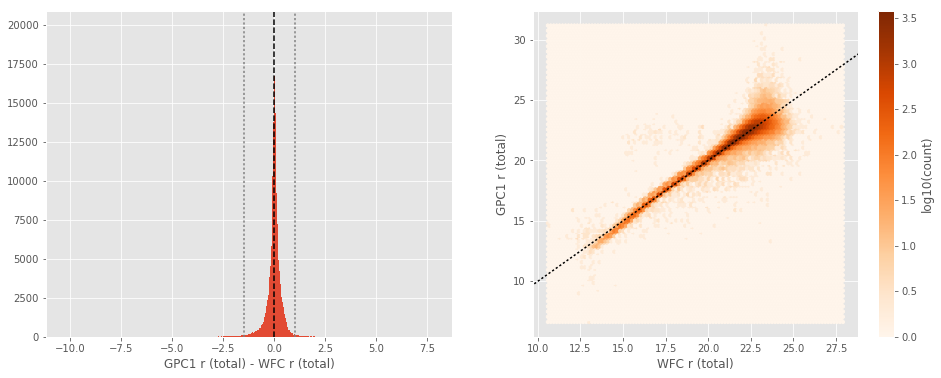

GPC1 r (aperture) - Megacam r (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.22
- 1% percentile: -3.7211384391784668
- 99% percentile: 1.368954734802246


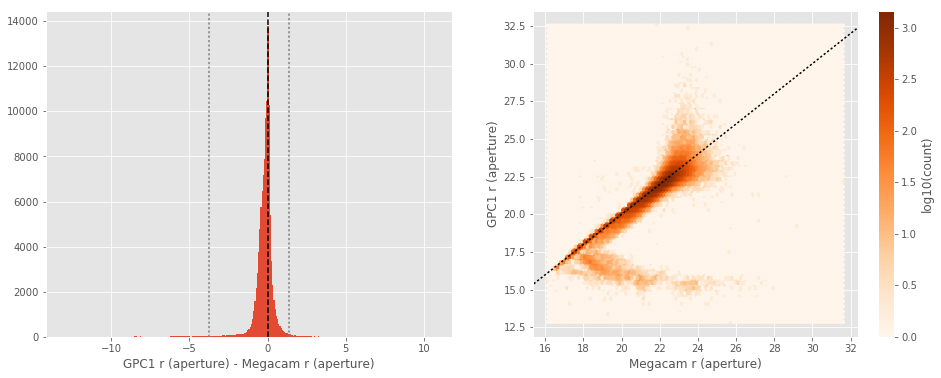

GPC1 r (total) - Megacam r (total):
- Median: 0.13
- Median Absolute Deviation: 0.12
- 1% percentile: -2.6343079566955567
- 99% percentile: 1.1148523330688487


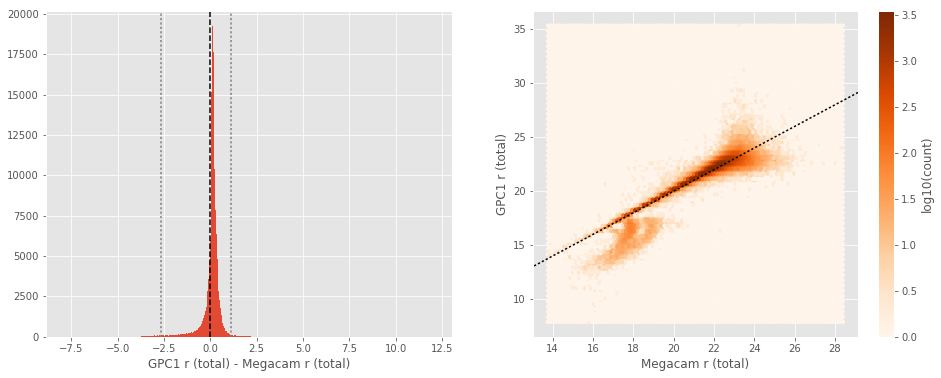

Megacam i (total) - WFC i (total):
- Median: -0.10
- Median Absolute Deviation: 0.18
- 1% percentile: -1.0972267913818359
- 99% percentile: 1.3545275878906249


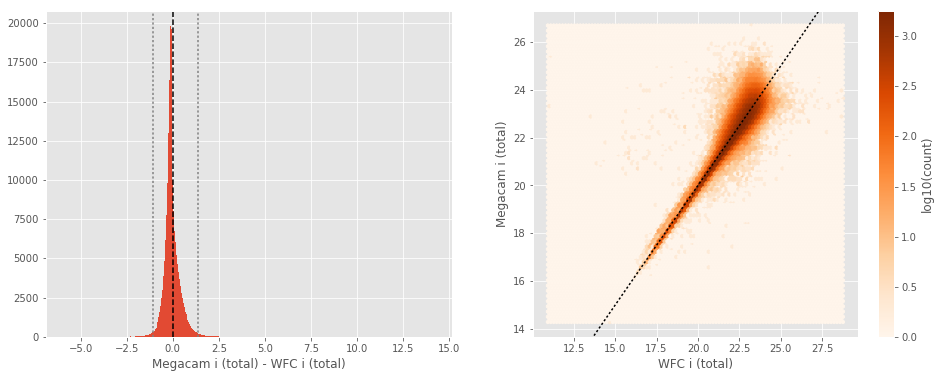

GPC1 i (aperture) - WFC i (aperture):
- Median: 0.03
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9274186611175538
- 99% percentile: 0.9799727630615245


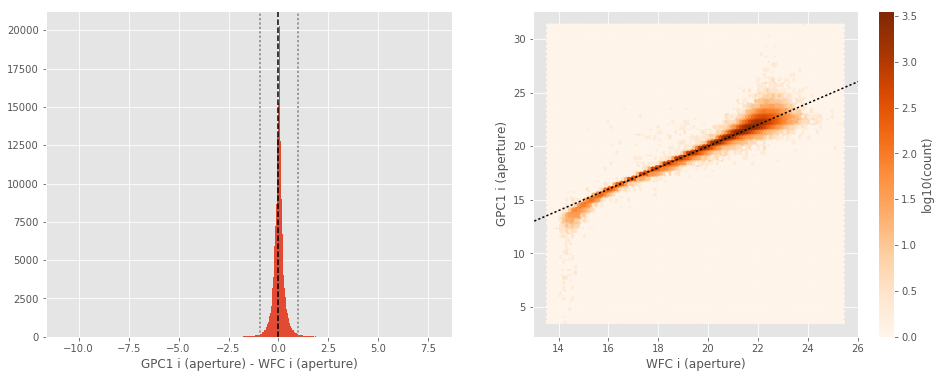

GPC1 i (total) - WFC i (total):
- Median: 0.10
- Median Absolute Deviation: 0.11
- 1% percentile: -1.008834228515625
- 99% percentile: 0.8782679748535149


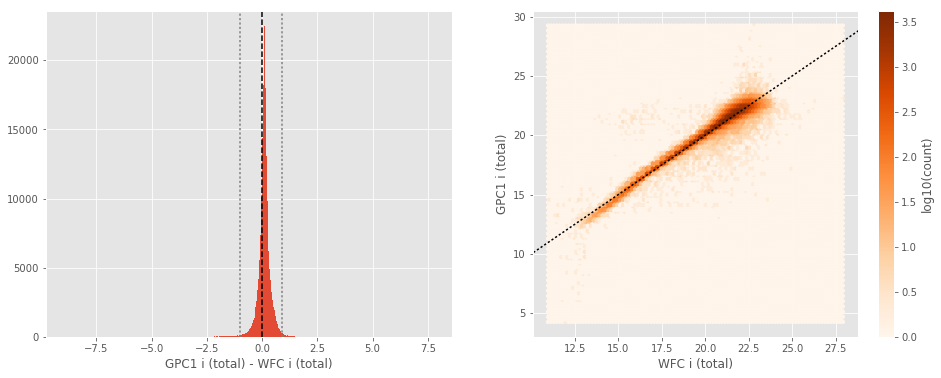

GPC1 i (total) - Megacam i (total):
- Median: 0.23
- Median Absolute Deviation: 0.09
- 1% percentile: -0.6308538055419921
- 99% percentile: 0.8275779342651322


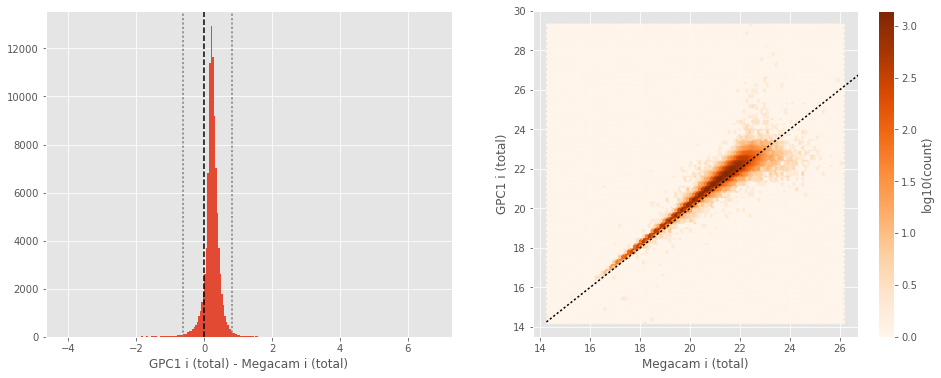

Megacam z (aperture) - WFC z (aperture):
- Median: 0.14
- Median Absolute Deviation: 0.17
- 1% percentile: -0.6702371978759765
- 99% percentile: 3.5893981742858516


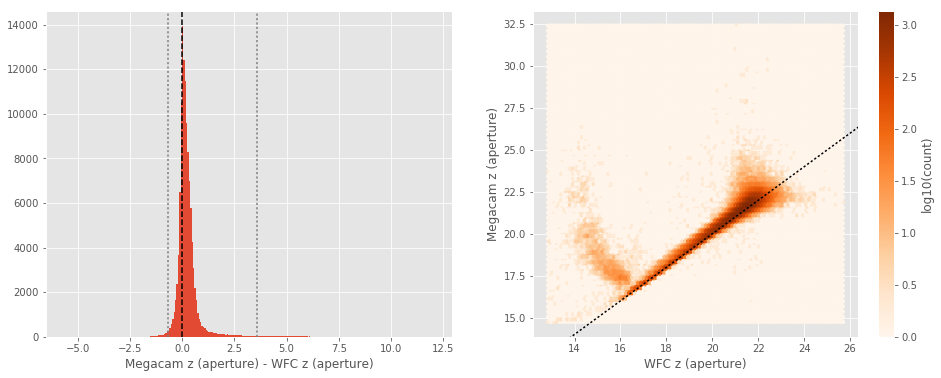

Megacam z (total) - WFC z (total):
- Median: -0.05
- Median Absolute Deviation: 0.21
- 1% percentile: -0.9880290985107422
- 99% percentile: 2.491147117614756


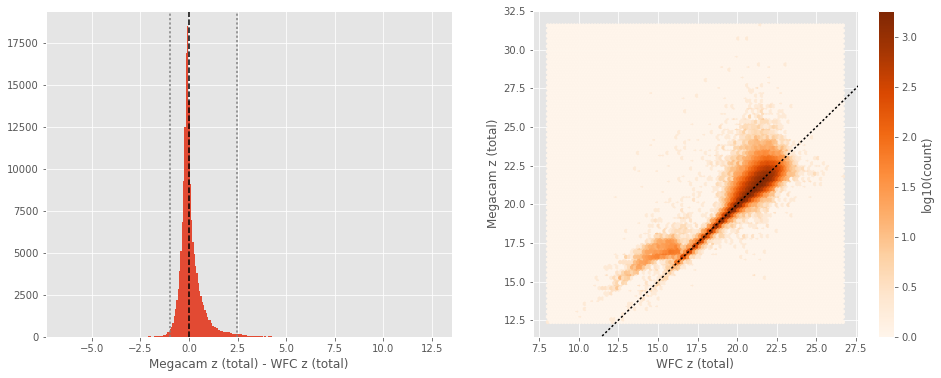

GPC1 z (aperture) - WFC z (aperture):
- Median: 0.04
- Median Absolute Deviation: 0.13
- 1% percentile: -0.8755176925659179
- 99% percentile: 1.1334119796752926


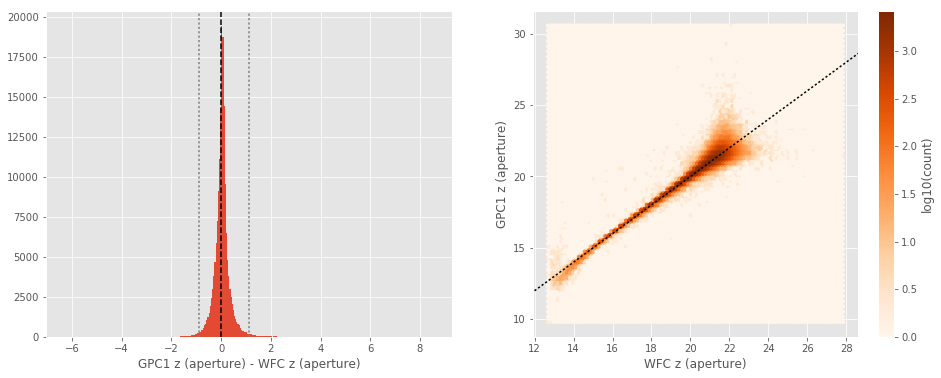

GPC1 z (total) - WFC z (total):
- Median: 0.08
- Median Absolute Deviation: 0.17
- 1% percentile: -0.9569845581054688
- 99% percentile: 1.4286836242675776


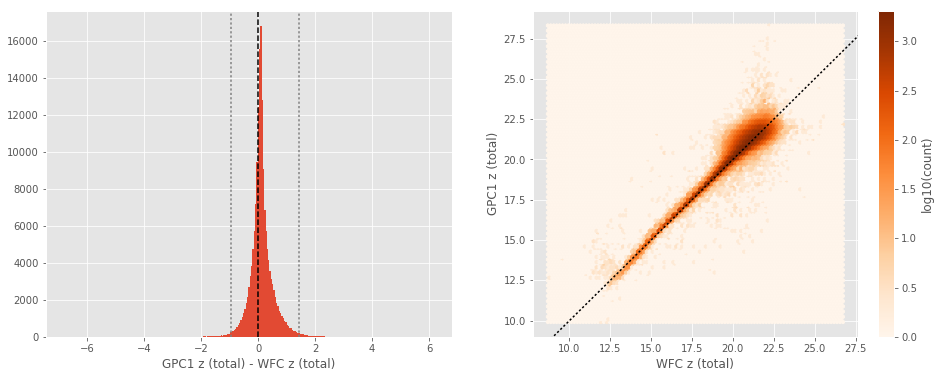

GPC1 z (aperture) - Megacam z (aperture):
- Median: -0.06
- Median Absolute Deviation: 0.20
- 1% percentile: -3.8274253082275393
- 99% percentile: 1.0357662200927726


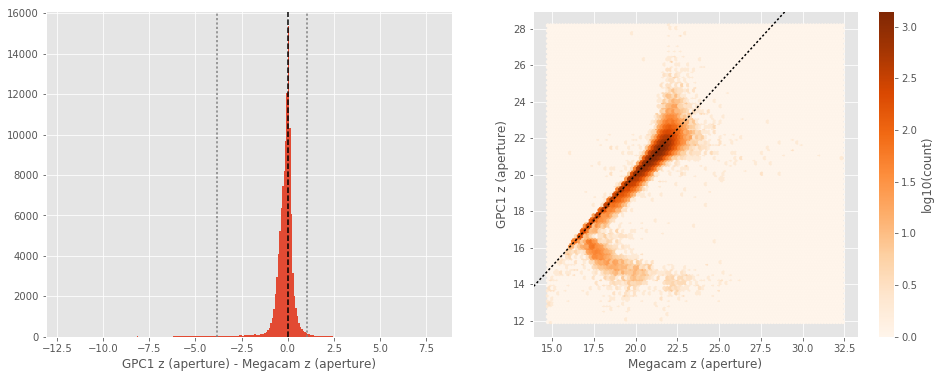

GPC1 z (total) - Megacam z (total):
- Median: 0.16
- Median Absolute Deviation: 0.11
- 1% percentile: -2.113486852645874
- 99% percentile: 0.9969313812255862


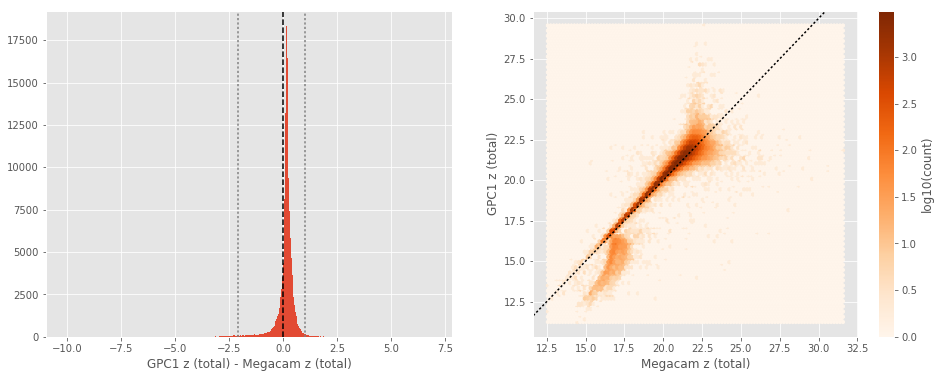

No sources have both Megacam y (total) and GPC1 y (total) values.


In [10]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        # RCS has no aperture magnitudes
        if ('megacam_i' not in basecol1 
            and 'megacam_i' not in basecol2 
            and 'megacam_y' not in basecol1
            and'megacam_y' not in basecol1):
            col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
            nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                            labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS magnitudes.

In [11]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [12]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_ELAIS-N2.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

WFC u (aperture) - SDSS u (fiberMag):
- Median: -0.30
- Median Absolute Deviation: 0.18
- 1% percentile: -1.6183706665039062
- 99% percentile: 0.9621364212036125


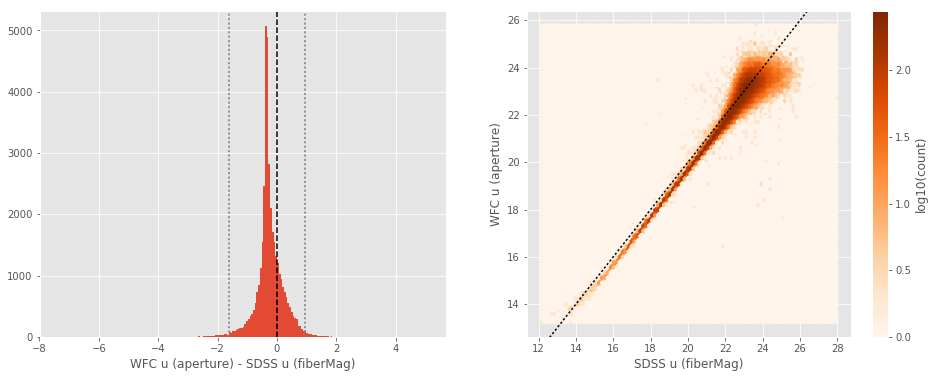

WFC u (total) - SDSS u (petroMag):
- Median: 0.02
- Median Absolute Deviation: 0.39
- 1% percentile: -3.5911664962768555
- 99% percentile: 2.0833364486694332


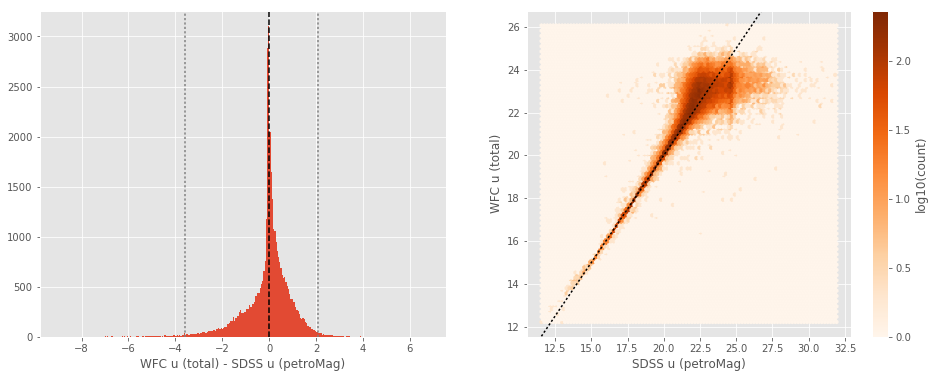

Megacam u (aperture) - SDSS u (fiberMag):
- Median: -0.04
- Median Absolute Deviation: 0.58
- 1% percentile: -1.6583412170410157
- 99% percentile: 3.297002315521247


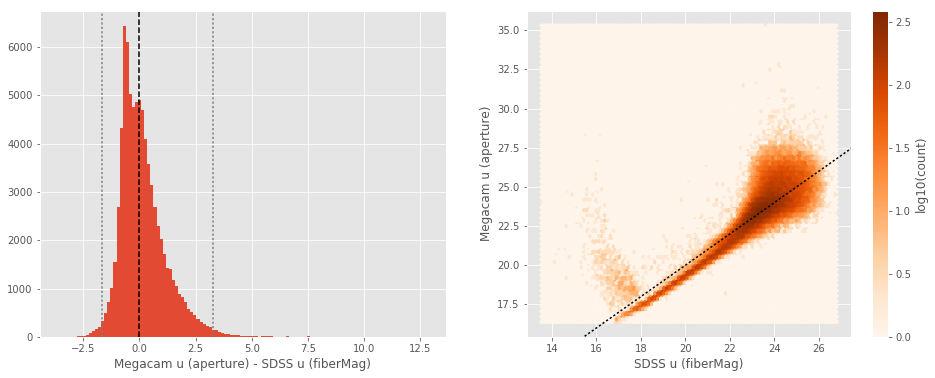

Megacam u (total) - SDSS u (petroMag):
- Median: 0.01
- Median Absolute Deviation: 0.78
- 1% percentile: -3.667929153442383
- 99% percentile: 4.777685279846186


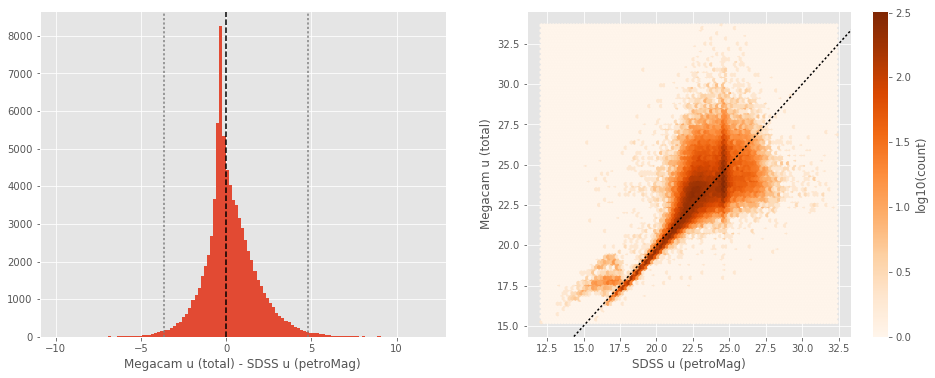

WFC g (aperture) - SDSS g (fiberMag):
- Median: -0.44
- Median Absolute Deviation: 0.11
- 1% percentile: -1.1331189155578614
- 99% percentile: 0.5049597740173323


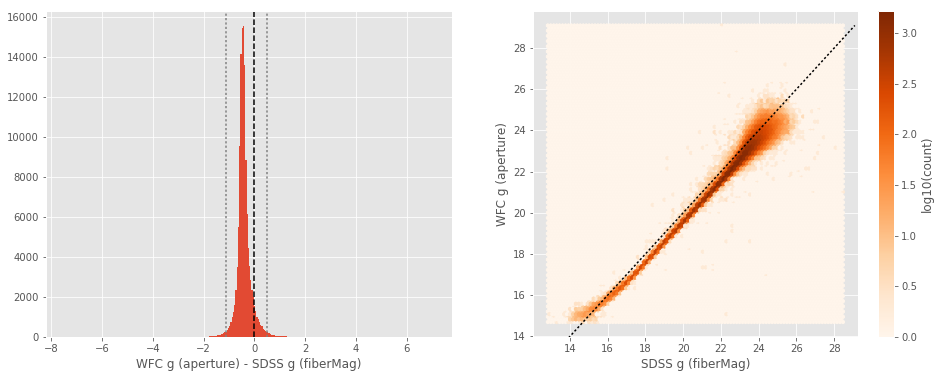

WFC g (total) - SDSS g (petroMag):
- Median: -0.10
- Median Absolute Deviation: 0.20
- 1% percentile: -3.129057636260986
- 99% percentile: 1.3354981803893995


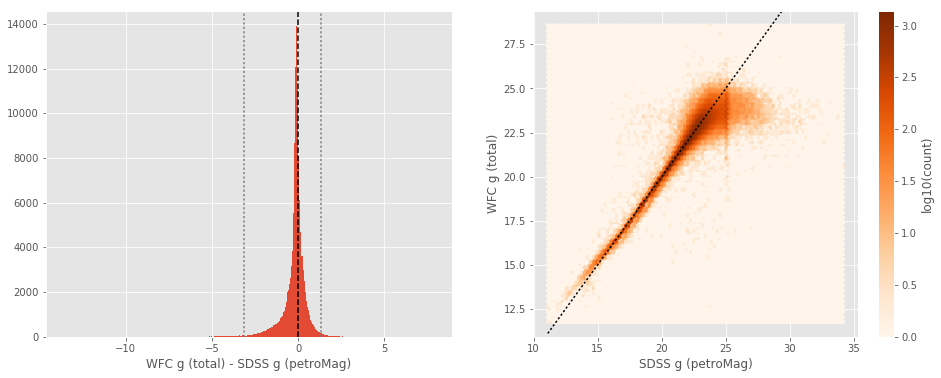

Megacam g (aperture) - SDSS g (fiberMag):
- Median: -0.36
- Median Absolute Deviation: 0.18
- 1% percentile: -1.1016152000427246
- 99% percentile: 3.0158825111388934


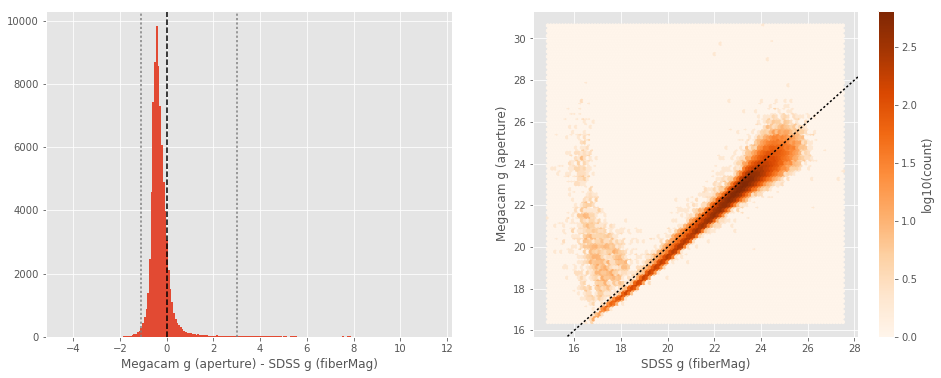

Megacam g (total) - SDSS g (petroMag):
- Median: -0.19
- Median Absolute Deviation: 0.22
- 1% percentile: -3.1404543685913087
- 99% percentile: 2.7350458717346218


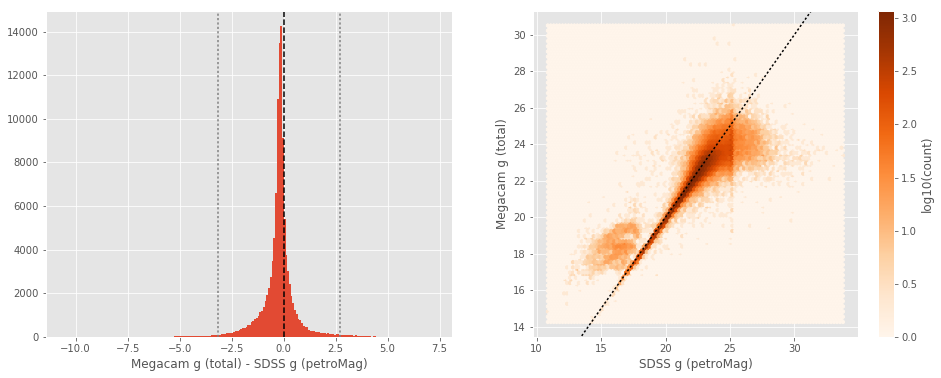

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.46
- Median Absolute Deviation: 0.20
- 1% percentile: -2.3214307403564454
- 99% percentile: 1.6727563476562555


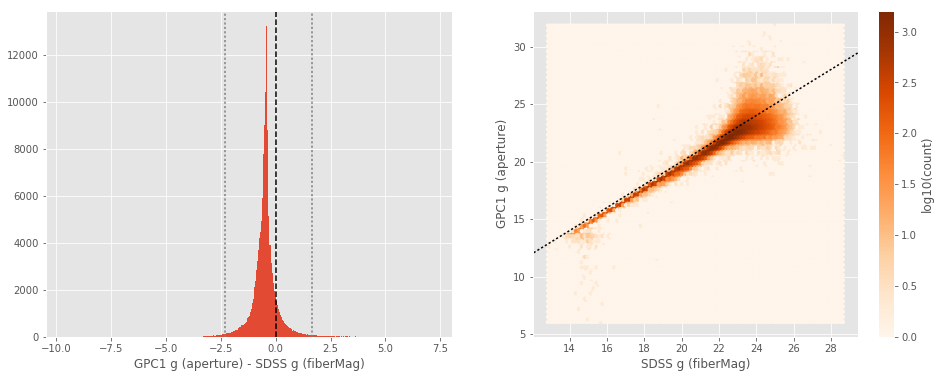

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.07
- Median Absolute Deviation: 0.21
- 1% percentile: -3.8290951538085936
- 99% percentile: 1.566672172546387


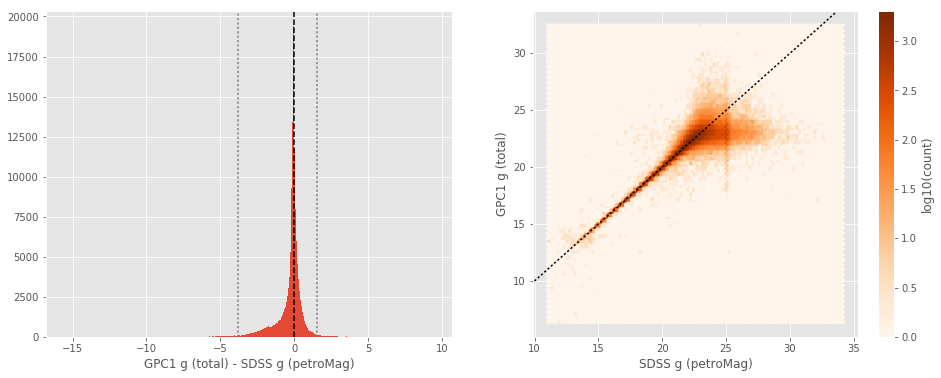

WFC r (aperture) - SDSS r (fiberMag):
- Median: -0.34
- Median Absolute Deviation: 0.07
- 1% percentile: -0.890346794128418
- 99% percentile: 0.36871064186096253


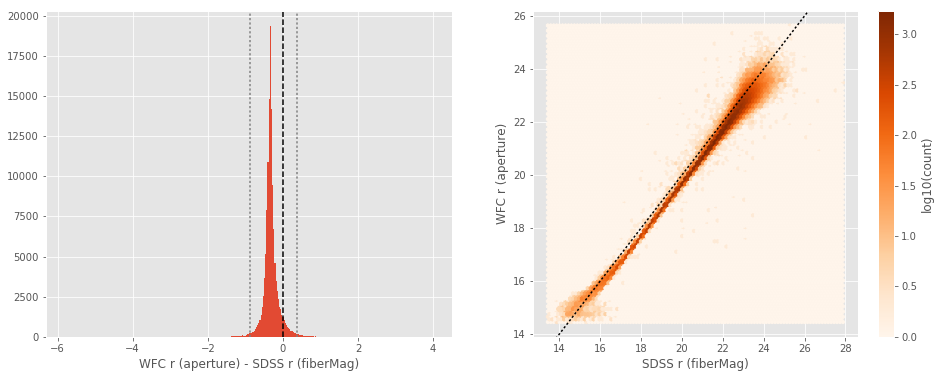

WFC r (total) - SDSS r (petroMag):
- Median: 0.02
- Median Absolute Deviation: 0.13
- 1% percentile: -2.631558589935303
- 99% percentile: 1.1928212451934812


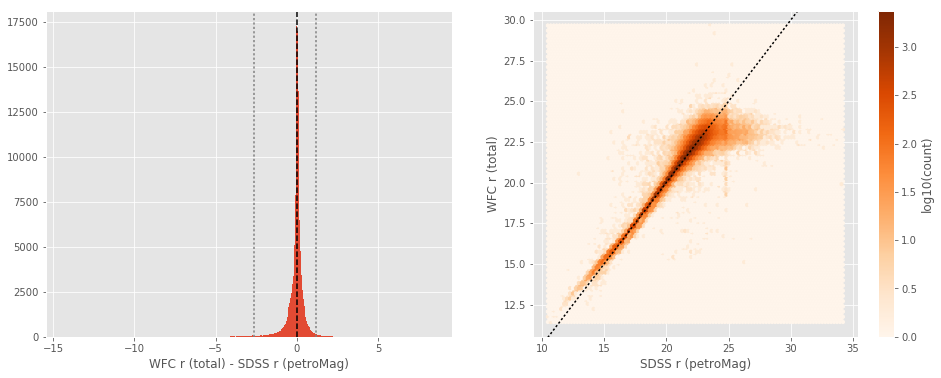

Megacam r (aperture) - SDSS r (fiberMag):
- Median: -0.27
- Median Absolute Deviation: 0.13
- 1% percentile: -0.8717788696289063
- 99% percentile: 3.9546873378753666


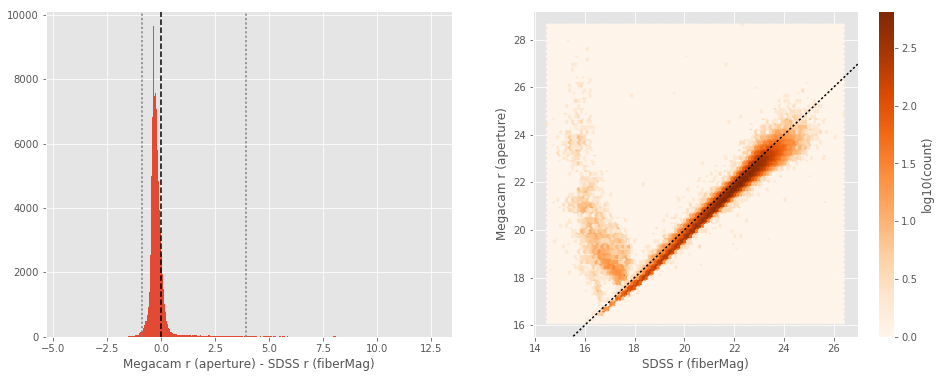

Megacam r (total) - SDSS r (petroMag):
- Median: -0.08
- Median Absolute Deviation: 0.14
- 1% percentile: -2.6924261474609374
- 99% percentile: 2.625380144119263


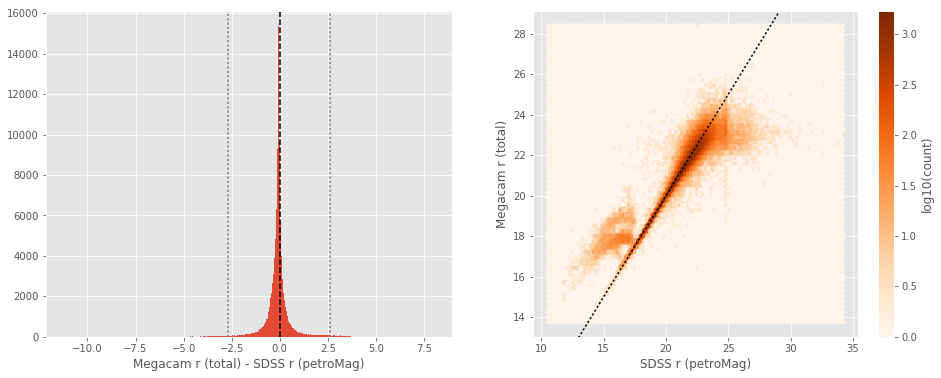

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.35
- Median Absolute Deviation: 0.11
- 1% percentile: -1.2985172271728516
- 99% percentile: 0.8457000732421677


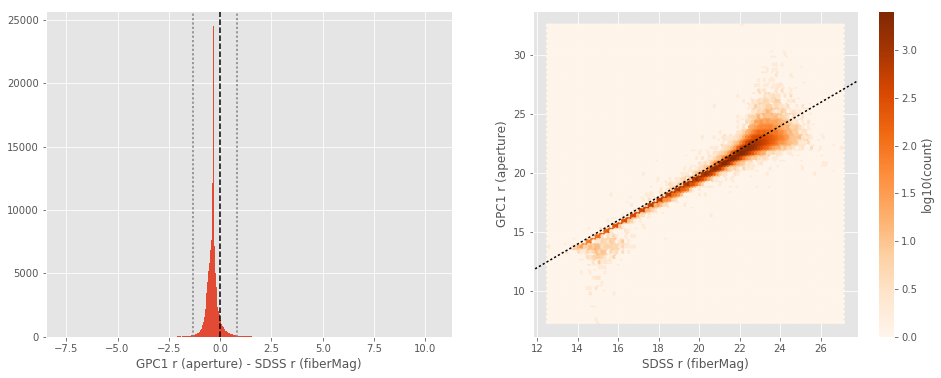

GPC1 r (total) - SDSS r (petroMag):
- Median: 0.04
- Median Absolute Deviation: 0.12
- 1% percentile: -2.490856704711914
- 99% percentile: 1.1595484161376994


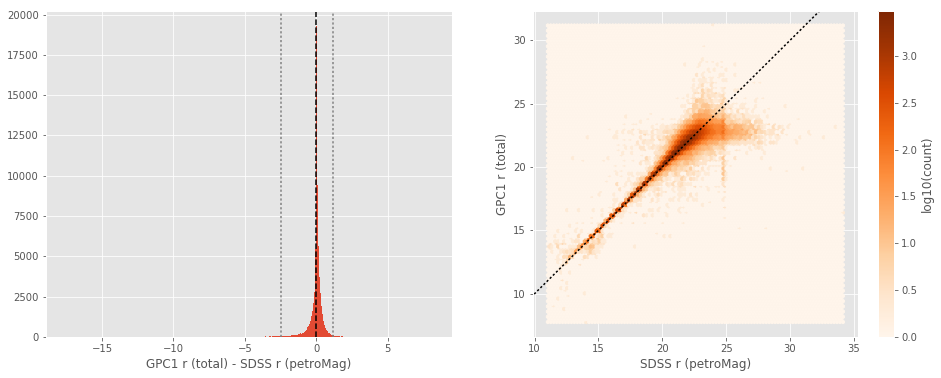

WFC i (aperture) - SDSS i (fiberMag):
- Median: -0.39
- Median Absolute Deviation: 0.08
- 1% percentile: -0.9288136291503907
- 99% percentile: 0.4154920196533197


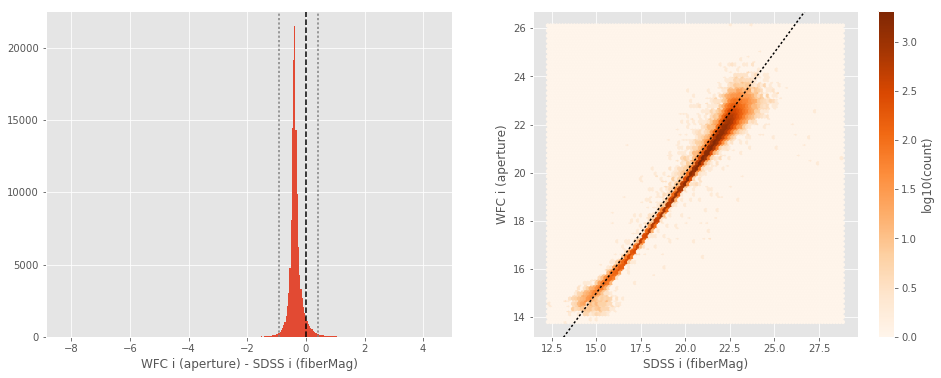

WFC i (total) - SDSS i (petroMag):
- Median: -0.03
- Median Absolute Deviation: 0.15
- 1% percentile: -3.5953659820556645
- 99% percentile: 1.096096134185793


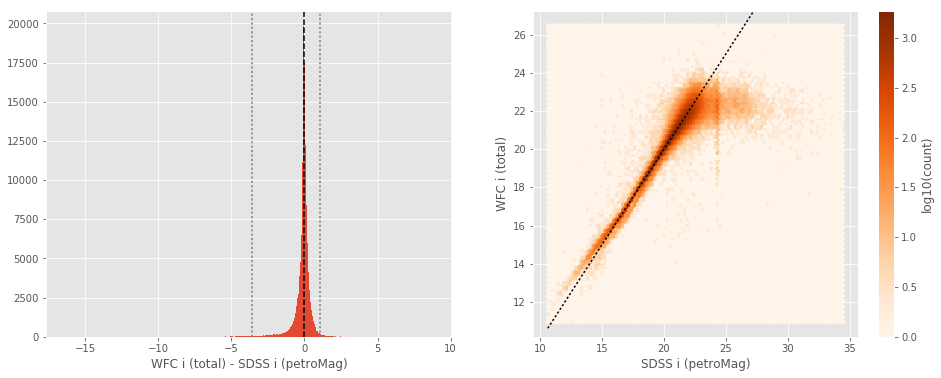

Megacam i (total) - SDSS i (petroMag):
- Median: -0.15
- Median Absolute Deviation: 0.14
- 1% percentile: -3.882351112365723
- 99% percentile: 0.9395841598510641


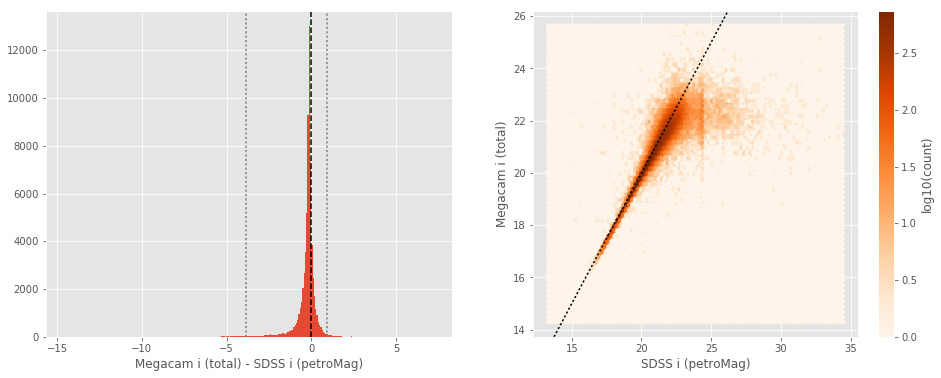

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.34
- Median Absolute Deviation: 0.09
- 1% percentile: -1.0123353004455566
- 99% percentile: 0.48122777938842726


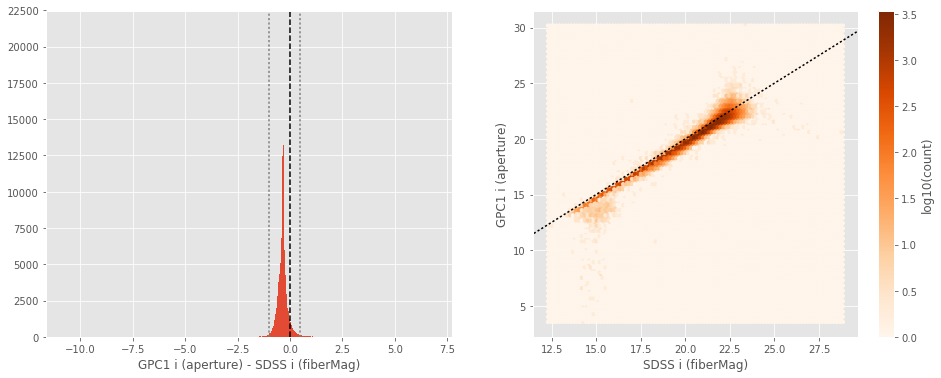

GPC1 i (total) - SDSS i (petroMag):
- Median: 0.06
- Median Absolute Deviation: 0.10
- 1% percentile: -2.792536354064941
- 99% percentile: 0.9313366699218764


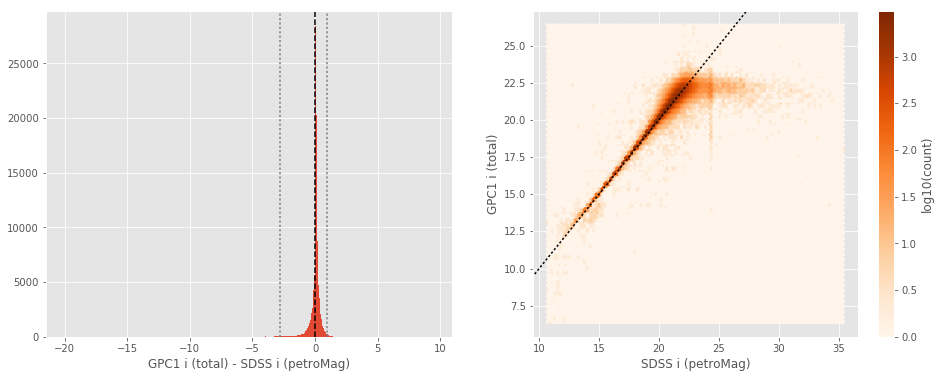

WFC z (aperture) - SDSS z (fiberMag):
- Median: -0.33
- Median Absolute Deviation: 0.11
- 1% percentile: -1.2395364761352539
- 99% percentile: 0.7405158233642565


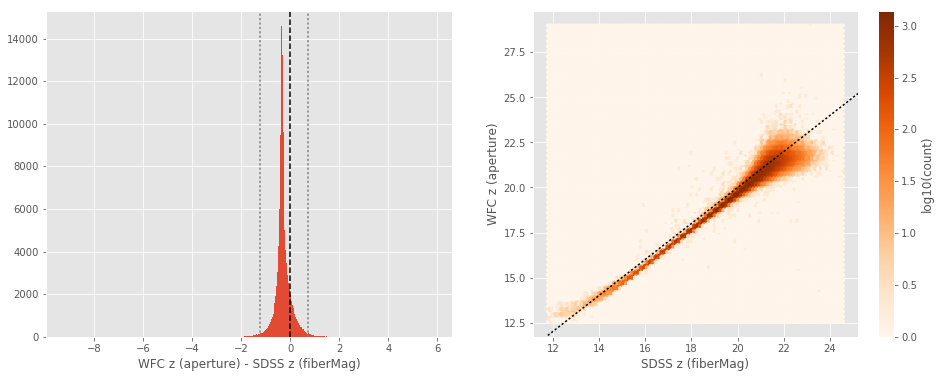

WFC z (total) - SDSS z (petroMag):
- Median: 0.02
- Median Absolute Deviation: 0.25
- 1% percentile: -3.4191538238525396
- 99% percentile: 1.5841140365600588


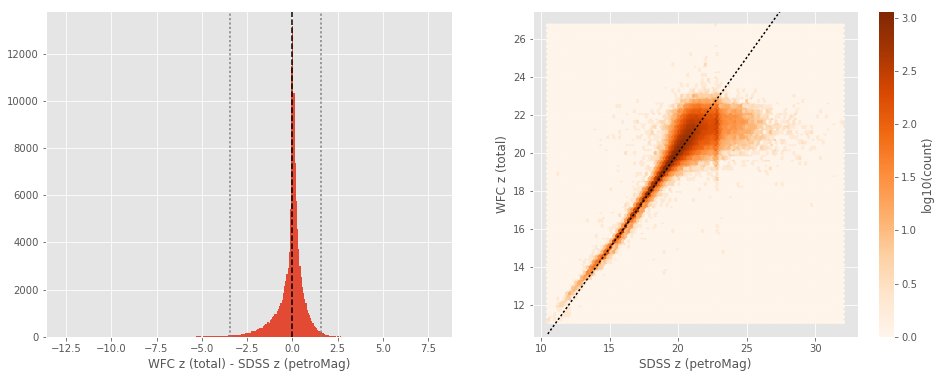

Megacam z (aperture) - SDSS z (fiberMag):
- Median: -0.19
- Median Absolute Deviation: 0.19
- 1% percentile: -1.0708820343017578
- 99% percentile: 3.6499409675597967


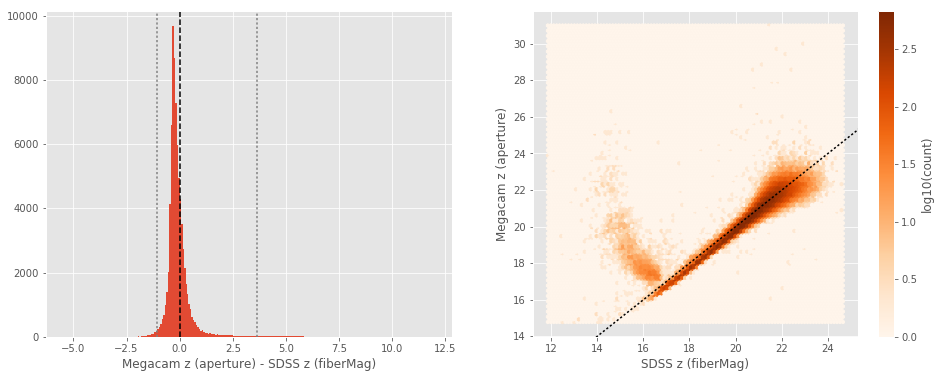

Megacam z (total) - SDSS z (petroMag):
- Median: -0.02
- Median Absolute Deviation: 0.29
- 1% percentile: -3.4646348953247066
- 99% percentile: 2.3932061958312985


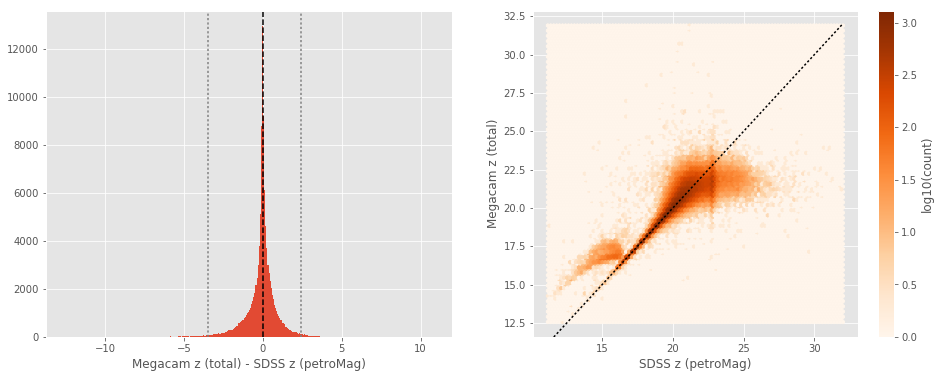

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.29
- Median Absolute Deviation: 0.13
- 1% percentile: -1.2182876586914062
- 99% percentile: 0.9481426239013657


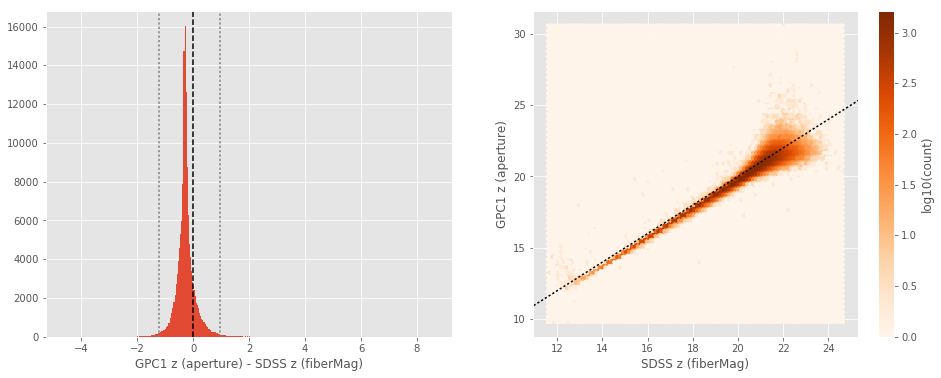

GPC1 z (total) - SDSS z (petroMag):
- Median: 0.10
- Median Absolute Deviation: 0.22
- 1% percentile: -3.3037926483154294
- 99% percentile: 1.6336569023132324


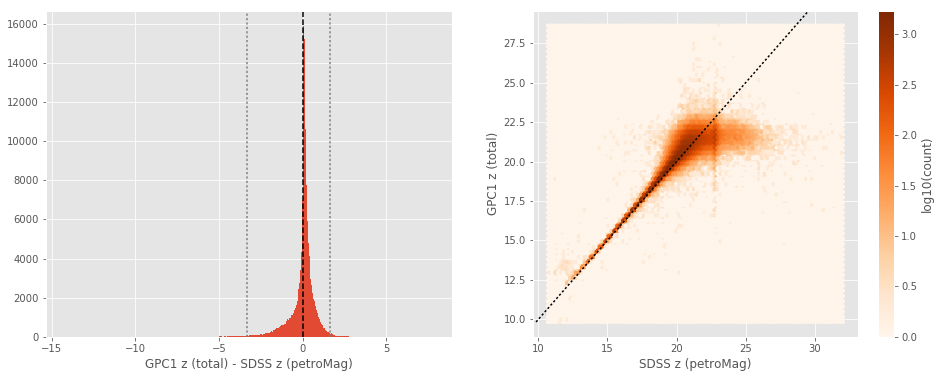

In [13]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap_colname = "fiberMag_{}".format(band[-1])
        sdss_mag_tot_colname = "petroMag_{}".format(band[-1])
        master_cat_mag_ap_colname = "m_ap_{}".format(band.replace(" ", "_").lower())
        master_cat_mag_tot_colname = "m_{}".format(band.replace(" ", "_").lower())
        
        # Set SDSS magnitudes to NaN when the magnitude  is negative as SDSS uses large
        # negative numbers for missing magnitudes
        sdss[sdss_mag_ap_colname][sdss[sdss_mag_ap_colname] < 0.] = np.nan
        sdss[sdss_mag_tot_colname][sdss[sdss_mag_tot_colname] < 0.] = np.nan
  
        if not 'megacam_i' in master_cat_mag_ap_colname:
            sdss_mag_ap = sdss[sdss_mag_ap_colname]
            master_cat_mag_ap = master_catalogue[master_cat_mag_ap_colname][ml_sdss_idx]
    
            nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                            labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss[sdss_mag_tot_colname]
        master_cat_mag_tot = master_catalogue[master_cat_mag_tot_colname][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_tot, master_cat_mag_tot,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

## Keeping only sources with good signal to noise ratio

From here, we are only comparing sources with a signal to noise ratio above 3, i.e. roughly we a magnitude error below 0.3.

*To make it easier, we are setting to NaN in the catalogue the magnitudes associated with an error above 0.3 so we can't use these magnitudes after the next cell.*

In [14]:
for error_column in [_ for _ in master_catalogue.colnames if _.startswith('merr_')]:
    column = error_column.replace("merr", "m")
    keep_mask = np.isfinite(master_catalogue[error_column])
    keep_mask[keep_mask] &= master_catalogue[keep_mask][error_column] <= 0.3
    master_catalogue[column][~keep_mask] = np.nan

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 764942 / 1783240 (42.90%)


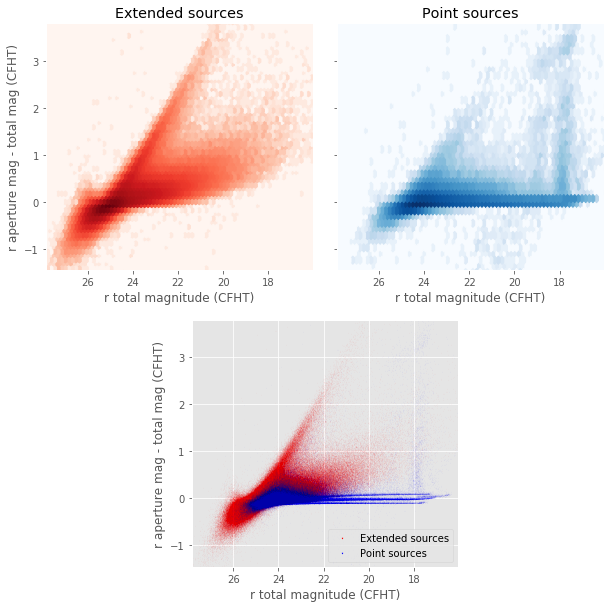

In [15]:
nb_ccplots(
    master_catalogue['m_megacam_r'],
    master_catalogue['m_ap_megacam_r'] - master_catalogue['m_megacam_r'],
    "r total magnitude (CFHT)", "r aperture mag - total mag (CFHT)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 102035 / 1783240 (5.72%)


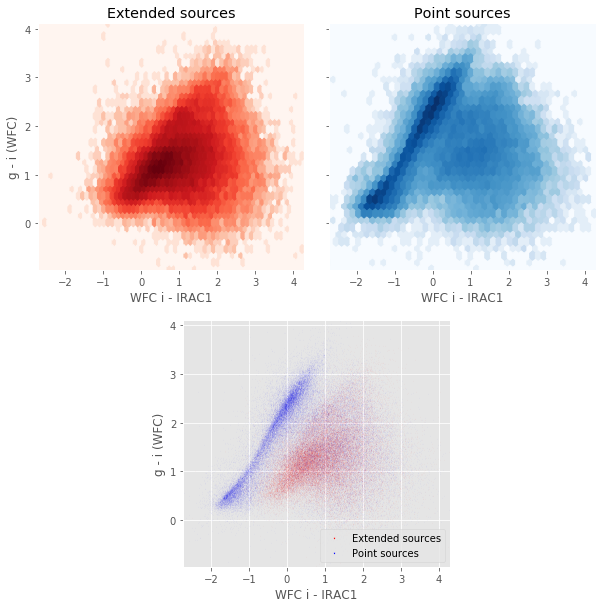

In [16]:
nb_ccplots(
    master_catalogue['m_wfc_i'] - master_catalogue['m_irac_i1'],
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfc_i'],
    "WFC i - IRAC1", "g - i (WFC)",
    master_catalogue["stellarity"]
)

Number of source used: 666339 / 1783240 (37.37%)


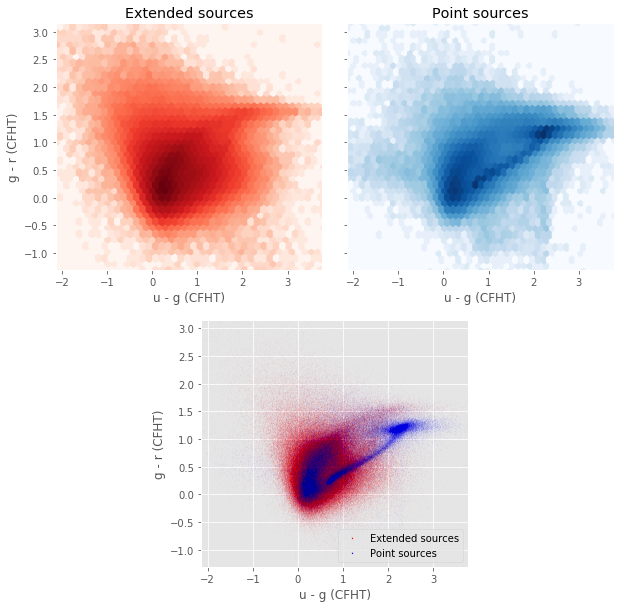

In [17]:
nb_ccplots(
    master_catalogue['m_megacam_u'] - master_catalogue['m_megacam_g'],
    master_catalogue['m_megacam_g'] - master_catalogue['m_megacam_r'],
    "u - g (CFHT)", "g - r (CFHT)",
    master_catalogue["stellarity"]
)

Number of source used: 19548 / 1783240 (1.10%)


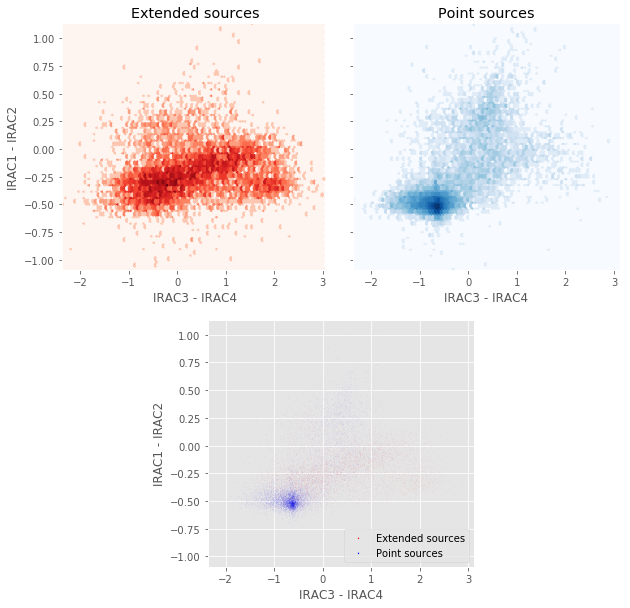

In [18]:
nb_ccplots(
    master_catalogue['m_irac_i3'] - master_catalogue['m_irac_i4'],
    master_catalogue['m_irac_i1'] - master_catalogue['m_irac_i2'],
    "IRAC3 - IRAC4", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)